In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from featexp import univariate_plotter
from featexp import get_trend_stats
from featexp import get_univariate_plots

In [5]:
def get_nonull_dummy_data(application_train_raw, dummy_drop=['ORGANIZATION_TYPE']):
    # Idenifying float cols with less nulls and imputing with mean
    nulls = pd.isnull(application_train_raw).sum()
    less_nulls = nulls[(nulls < 3075) & (nulls != 0)].index
    less_nulls_float = []
    for i in range(len(less_nulls)):
        if application_train_raw[less_nulls[i]].dtype != 'O':
            less_nulls_float.append(less_nulls[i])

    application_train_raw[less_nulls_float] = application_train_raw[less_nulls_float].fillna(application_train_raw[less_nulls_float].mean())

    # Idenifying float cols with high nulls and creating null_flag column and imputing with min-10
    more_nulls = nulls[(nulls >= 3075)].index
    more_nulls_float = []
    for i in range(len(more_nulls)):
        if application_train_raw[more_nulls[i]].dtype != 'O':
            more_nulls_float.append(more_nulls[i])

    application_train_raw[more_nulls_float] = application_train_raw[more_nulls_float].fillna(application_train_raw[more_nulls_float].min() - 100)

    # Get dummies. Drop some columns for now
    application_train_raw.drop(columns=dummy_drop, axis=1, inplace=True)  # Try using later

    all_cols = application_train_raw.columns
    cat_cols = []
    for col in all_cols:
        if application_train_raw[col].dtype == 'O':
            cat_cols.append(col)

    application_train_raw = pd.get_dummies(application_train_raw, columns=cat_cols, dummy_na=True)

    return application_train_raw


def import_and_create_train_test_data(test_size=0.33, random_state=42):
    application_raw = pd.read_csv('data/application_train.csv')
    application = get_nonull_dummy_data(application_raw, dummy_drop=['ORGANIZATION_TYPE'])

    X = application.drop(['TARGET'], axis=1) # Contains ID
    y = application['TARGET']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    train_users = X_train[['SK_ID_CURR']]
    train_users['TARGET'] = y_train
    test_users = X_test[['SK_ID_CURR']]
    test_users['TARGET'] = y_test
    train_users.reset_index(drop=True, inplace=True)
    test_users.reset_index(drop=True, inplace=True)

    return(X_train, X_test, y_train, y_test, train_users, test_users)

def import_and_create_TEST_data():
    application_raw = pd.read_csv('data/application_test.csv')
    application = get_nonull_dummy_data(application_raw, dummy_drop=['ORGANIZATION_TYPE'])

    X = application # Contains ID

    users = X[['SK_ID_CURR']]
    users.reset_index(drop=True, inplace=True)

    return(X, users)
def get_imp_df(xgb_model):
    imp = pd.DataFrame(np.asarray(list(xgb_model.get_fscore().keys())))
    imp.columns = ['Feature']
    imp['importance'] = np.asarray(list(xgb_model.get_fscore().values()))
    imp = imp.sort_values(by=['importance'], ascending=False)
    imp = imp.reset_index(drop=True)
    return (imp)


In [6]:
X_train, X_test, y_train, y_test, train_users, test_users = import_and_create_train_test_data()
X_TEST, TEST_users = import_and_create_TEST_data()

drop=['CODE_GENDER_XNA', 'NAME_INCOME_TYPE_Maternity leave', 'NAME_FAMILY_STATUS_Unknown', 'SK_ID_CURR']
X_train = X_train.drop(drop, axis=1)
X_test = X_test.drop(drop, axis=1)

/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [7]:
data_train = X_train.reset_index(drop=True)
data_train['target'] = y_train.reset_index(drop=True)
data_test = X_test.reset_index(drop=True)
data_test['target'] = y_test.reset_index(drop=True)

                                        Plots for CNT_CHILDREN                                        
                                           Train data plots                                           


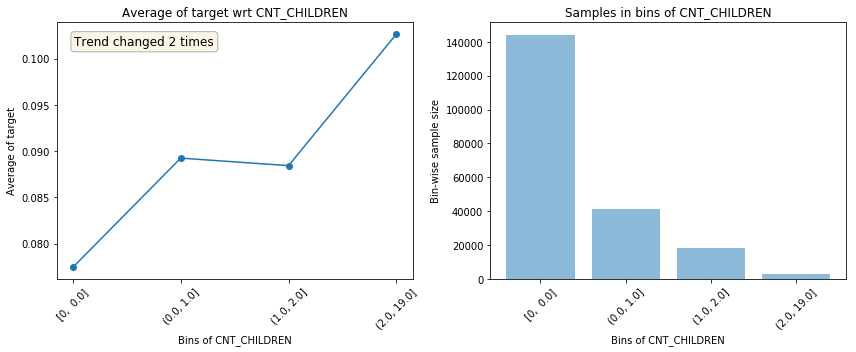

                                           Test data plots                                            


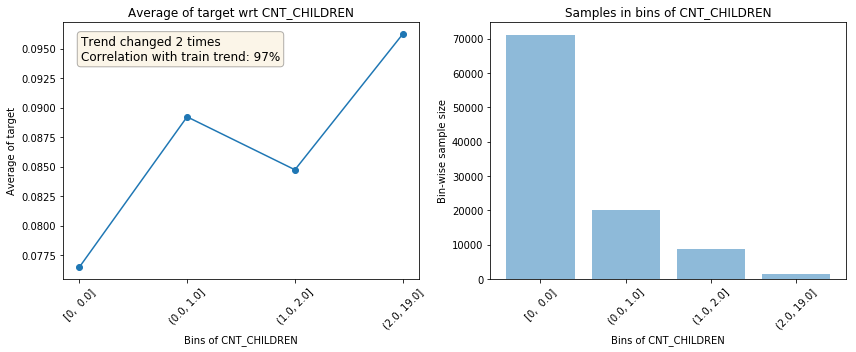

--------------------------------------------------------------------------------------------------------------


                                      Plots for AMT_INCOME_TOTAL                                      
                                           Train data plots                                           


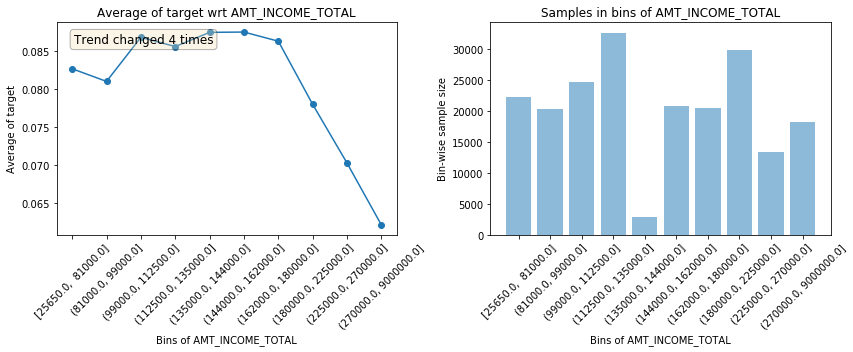

                                           Test data plots                                            


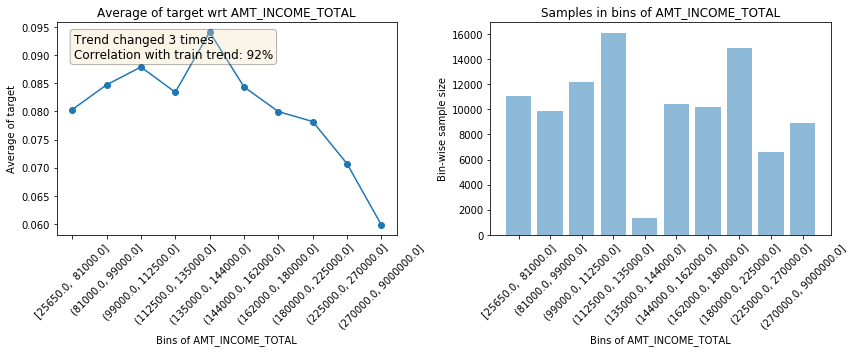

--------------------------------------------------------------------------------------------------------------


                                         Plots for AMT_CREDIT                                         
                                           Train data plots                                           


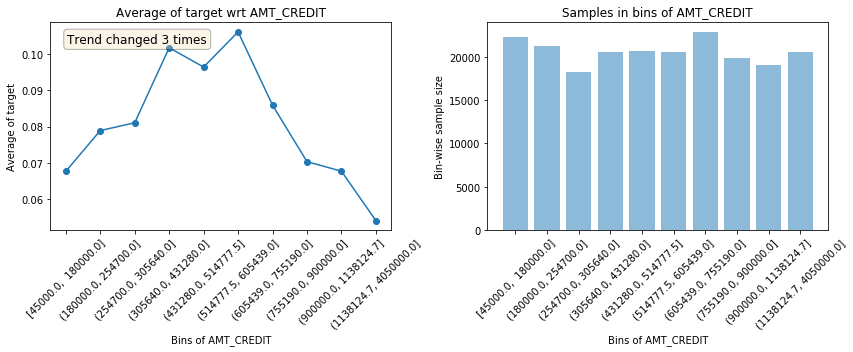

                                           Test data plots                                            


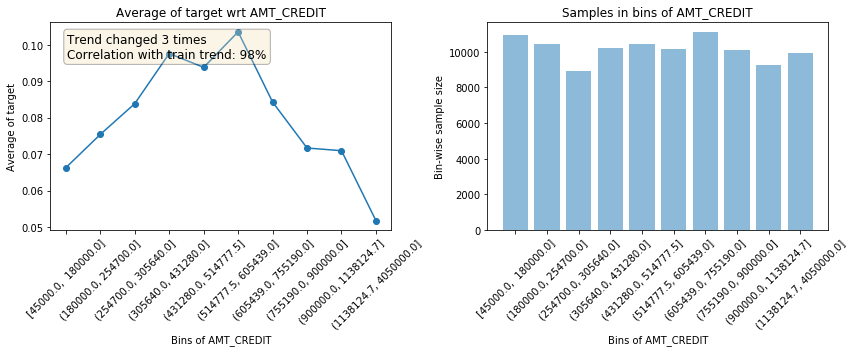

--------------------------------------------------------------------------------------------------------------


                                        Plots for AMT_ANNUITY                                         
                                           Train data plots                                           


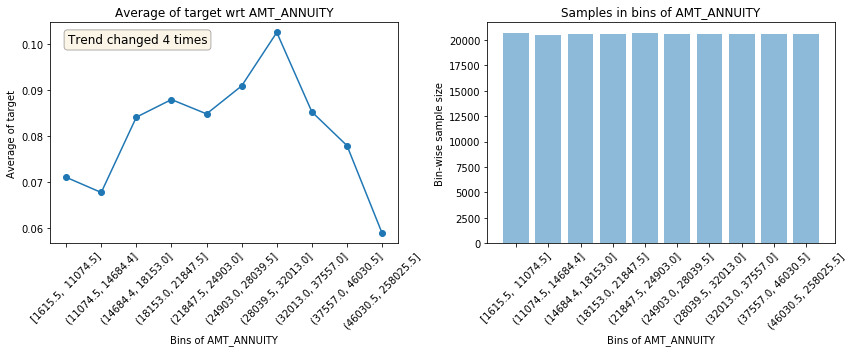

                                           Test data plots                                            


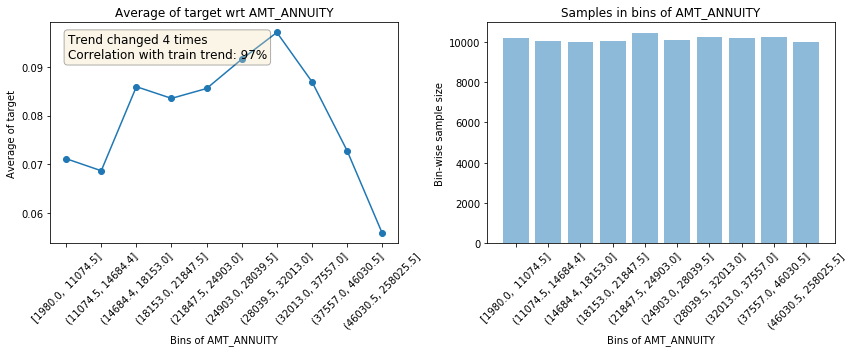

--------------------------------------------------------------------------------------------------------------


                                      Plots for AMT_GOODS_PRICE                                       
                                           Train data plots                                           


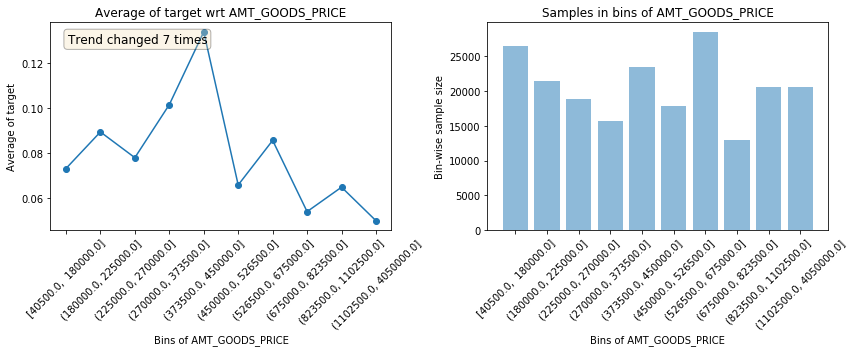

                                           Test data plots                                            


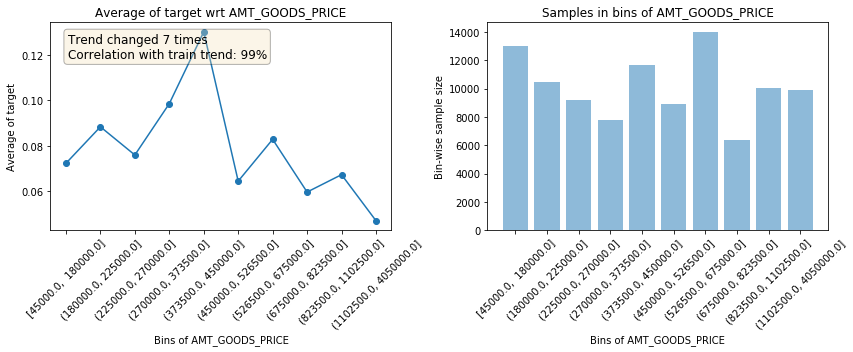

--------------------------------------------------------------------------------------------------------------


                                 Plots for REGION_POPULATION_RELATIVE                                 
                                           Train data plots                                           


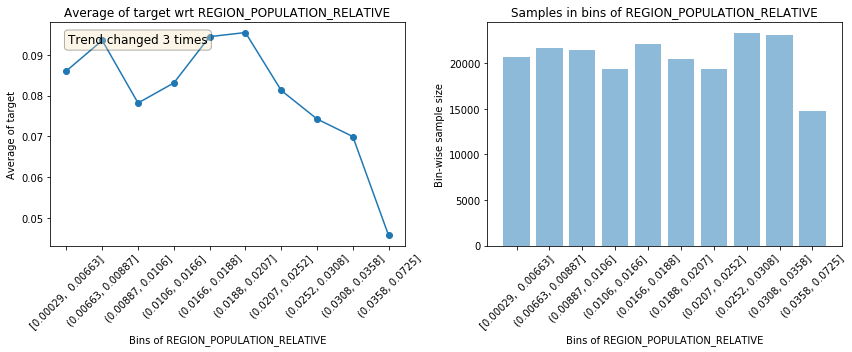

                                           Test data plots                                            


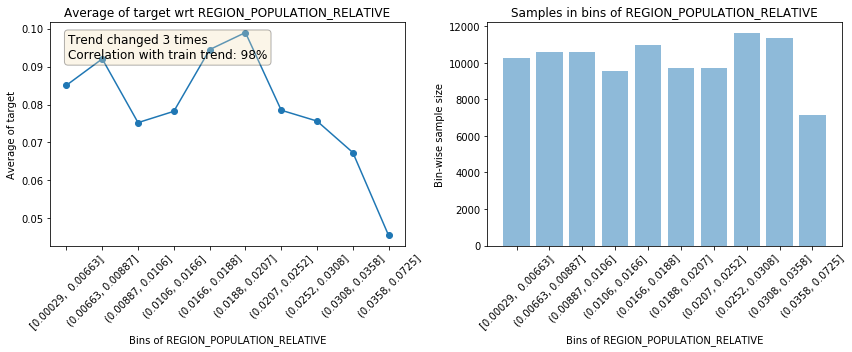

--------------------------------------------------------------------------------------------------------------


                                         Plots for DAYS_BIRTH                                         
                                           Train data plots                                           


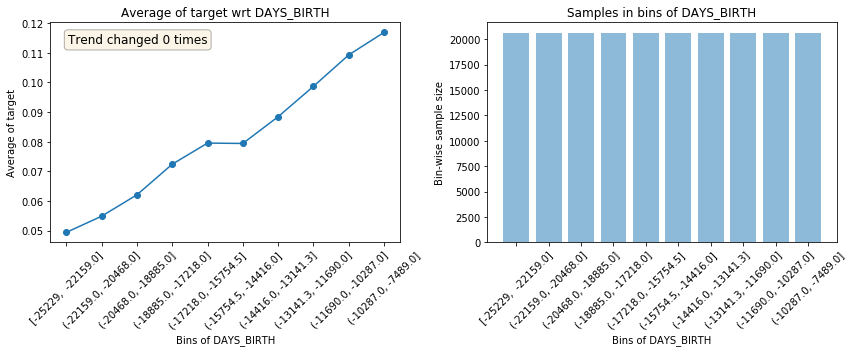

                                           Test data plots                                            


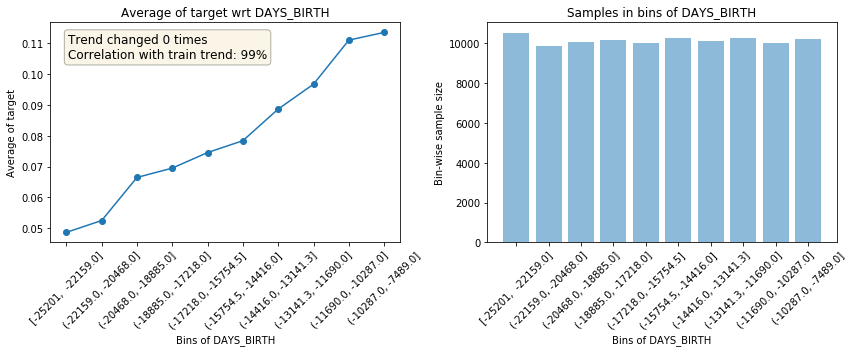

--------------------------------------------------------------------------------------------------------------


                                       Plots for DAYS_EMPLOYED                                        
                                           Train data plots                                           


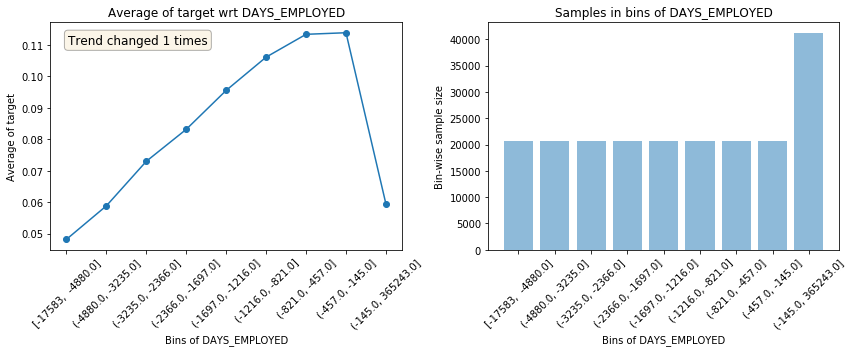

                                           Test data plots                                            


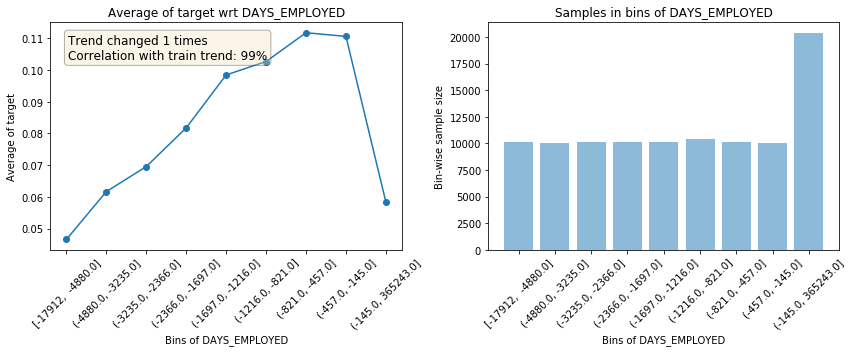

--------------------------------------------------------------------------------------------------------------


                                     Plots for DAYS_REGISTRATION                                      
                                           Train data plots                                           


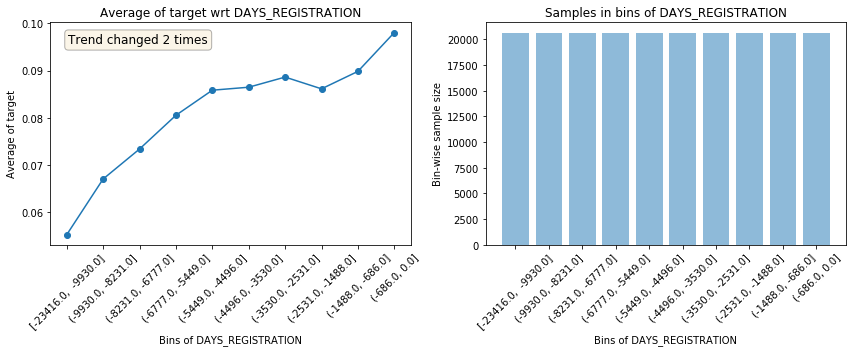

                                           Test data plots                                            


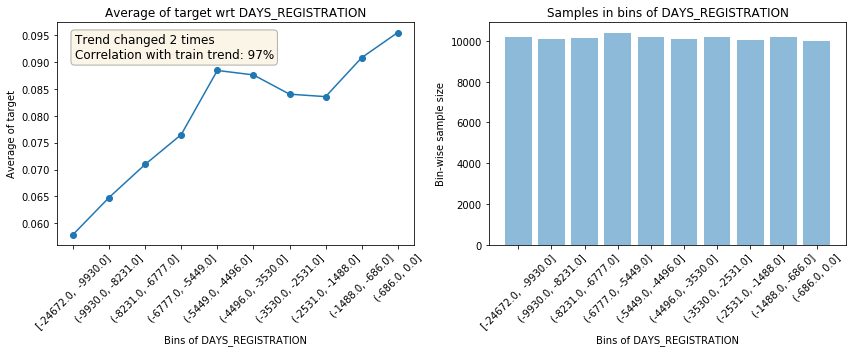

--------------------------------------------------------------------------------------------------------------


                                      Plots for DAYS_ID_PUBLISH                                       
                                           Train data plots                                           


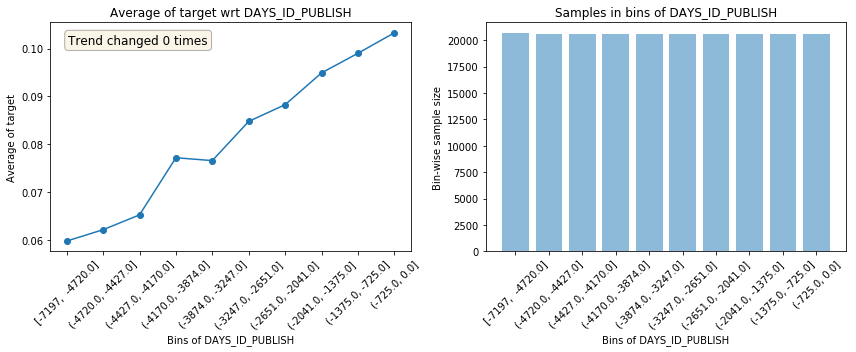

                                           Test data plots                                            


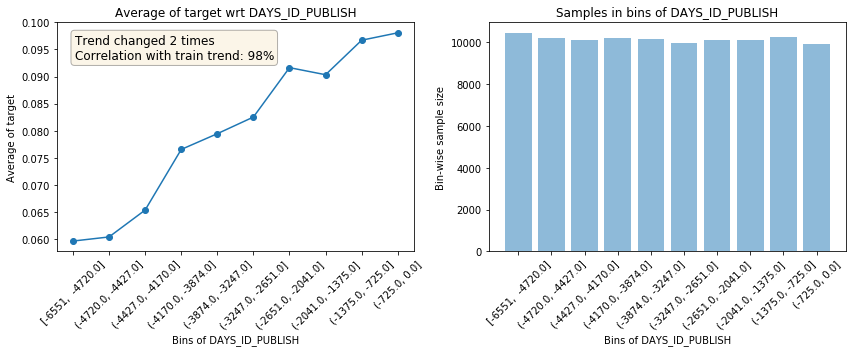

--------------------------------------------------------------------------------------------------------------




In [8]:
# plots univariate plots of first 10 columns in data_train
get_univariate_plots(data=data_train, target_col='target', features_list=data_train.columns[0:10], data_test=data_test)

                                      Plots for AMT_INCOME_TOTAL                                      
                                           Train data plots                                           


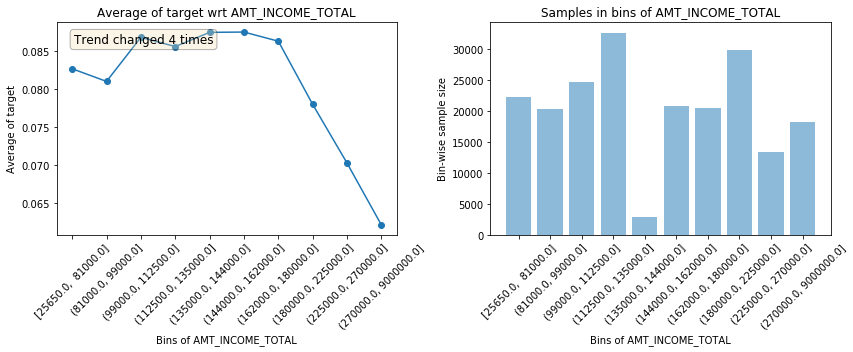

                                           Test data plots                                            


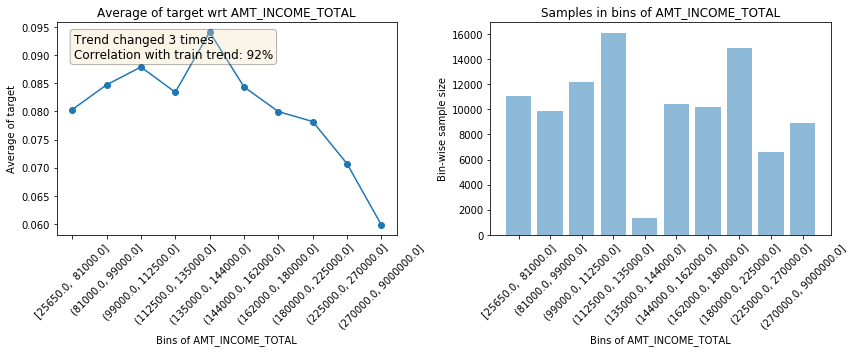

--------------------------------------------------------------------------------------------------------------




In [54]:
# Get grouped data, mean target and sample size of each group using univariate_plotter()
# With train and test data:
grouped_train, grouped_test = univariate_plotter(data=data_train, target_col='target', feature='AMT_INCOME_TOTAL',
                                                 data_test=data_test)

# With only train data
# grouped_train = univariate_plotter(data=data_train, target_col='target', feature='AMT_INCOME_TOTAL')

In [55]:
grouped_train #Grouped data showing bin level stats

,AMT_INCOME_TOTAL,Samples_in_bin,target_mean,AMT_INCOME_TOTAL_mean
0,"[25650.0, 81000.0]",22334,0.082699,66257.130366
1,"(81000.0, 99000.0]",20424,0.081032,91076.626816
2,"(99000.0, 112500.0]",24746,0.086842,111311.671092
3,"(112500.0, 135000.0]",32725,0.085623,131844.069914
4,"(135000.0, 144000.0]",2846,0.087491,142867.813598
5,"(144000.0, 162000.0]",20804,0.087531,157082.746126
6,"(162000.0, 180000.0]",20550,0.086326,178073.976044
7,"(180000.0, 225000.0]",29937,0.077997,212795.095082
8,"(225000.0, 270000.0]",13392,0.070266,259515.009845
9,"(270000.0, 9000000.0]",18274,0.062110,389590.875377


## Model trained using all features

In [5]:
dtrain = xgb.DMatrix(X_test, label=y_test, missing=np.nan)
dtest = xgb.DMatrix(X_train, label=y_train, missing=np.nan)

params = {'max_depth':8, 'learning_rate':0.1, 'silent':0, 'objective':'binary:logistic', 'min_child_weight':500,
            'eval_metric' : 'auc', 'nthread':8 } #col_sample_by_tree
xgb_model = xgb.train(params, dtrain, 400, evals=[(dtrain, 'train'), (dtest, 'test')], early_stopping_rounds=25) #, (dtest, 'test')


[20:14:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=6
[0]	train-auc:0.719209	test-auc:0.707376
Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 25 rounds.
[20:14:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=8
[1]	train-auc:0.725595	test-auc:0.712347
[20:14:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=8
[2]	train-auc:0.728705	test-auc:0.715003
[20:14:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=8
[3]	train-auc:0.729995	test-auc:0.716433
[20:14:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=7
[4]	train-auc:0.732111	test-auc:0.718063
[20:14:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned n

[20:14:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=8
[53]	train-auc:0.759302	test-auc:0.743022
[20:14:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=7
[54]	train-auc:0.759749	test-auc:0.743369
[20:14:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=7
[55]	train-auc:0.760193	test-auc:0.743686
[20:14:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=8
[56]	train-auc:0.760585	test-auc:0.743951
[20:14:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=7
[57]	train-auc:0.760943	test-auc:0.744304
[20:14:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=8
[58]	train-auc:0.761355	test-auc:0.74463
[20:14:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra 

[20:14:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=7
[107]	train-auc:0.772686	test-auc:0.751298
[20:14:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=8
[108]	train-auc:0.772833	test-auc:0.751304
[20:14:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=8
[109]	train-auc:0.773036	test-auc:0.751423
[20:14:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=6
[110]	train-auc:0.773247	test-auc:0.751515
[20:14:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=8
[111]	train-auc:0.773488	test-auc:0.751686
[20:14:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=8
[112]	train-auc:0.773658	test-auc:0.751746
[20:14:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22

[20:14:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=6
[160]	train-auc:0.780189	test-auc:0.754125
[20:14:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=5
[161]	train-auc:0.780331	test-auc:0.754166
[20:14:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=6
[162]	train-auc:0.780405	test-auc:0.754149
[20:14:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=6
[163]	train-auc:0.780477	test-auc:0.754152
[20:14:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=7
[164]	train-auc:0.780548	test-auc:0.754179
[20:14:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=7
[165]	train-auc:0.780704	test-auc:0.754231
[20:14:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16

[20:14:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=5
[213]	train-auc:0.785382	test-auc:0.754886
[20:14:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=7
[214]	train-auc:0.785472	test-auc:0.754883
[20:14:59] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=7
[215]	train-auc:0.785599	test-auc:0.754926
[20:14:59] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=7
[216]	train-auc:0.785716	test-auc:0.754978
[20:14:59] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=8
[217]	train-auc:0.785789	test-auc:0.754968
[20:14:59] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=8
[218]	train-auc:0.785895	test-auc:0.754987
[20:15:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16

[20:15:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=8
[266]	train-auc:0.790026	test-auc:0.755199
[20:15:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=7
[267]	train-auc:0.79014	test-auc:0.755247
[20:15:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=6
[268]	train-auc:0.790245	test-auc:0.755243
[20:15:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=6
[269]	train-auc:0.790323	test-auc:0.755222
[20:15:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=8
[270]	train-auc:0.790373	test-auc:0.755194
[20:15:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=7
[271]	train-auc:0.790488	test-auc:0.755248
[20:15:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 

[20:15:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=8
[319]	train-auc:0.794308	test-auc:0.755374
[20:15:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=6
[320]	train-auc:0.794378	test-auc:0.755374
[20:15:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=7
[321]	train-auc:0.794419	test-auc:0.755377
[20:15:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=6
[322]	train-auc:0.794475	test-auc:0.755355
[20:15:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=8
[323]	train-auc:0.794552	test-auc:0.755365
[20:15:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=8
[324]	train-auc:0.794608	test-auc:0.755341
[20:15:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18

In [6]:
dTEST = xgb.DMatrix(X_TEST[X_test.columns], missing=np.nan)
y_TEST_pred = xgb_model.predict(dTEST)
submission_all_feats = pd.DataFrame({'SK_ID_CURR' : TEST_users['SK_ID_CURR'], 'TARGET' : y_TEST_pred})
submission_all_feats.to_csv('submission_all_feats_1.csv', index=False)

## Calculating trend correlations and extracting feature importance from above model

In [7]:
importance_df = get_imp_df(xgb_model)
stats = get_trend_stats(data=data_train, target_col='target', data_test=data_test)
# 0 correlation is returned for constant valued features and hence get dropped based on low correlation criteria
stats = pd.merge(stats, importance_df, how='left', on='Feature')
stats['importance'] = stats['importance'].fillna(0)

Only one bin created for FLAG_MOBIL. Correlation can't be calculated
Only one bin created for FLAG_CONT_MOBILE. Correlation can't be calculated
Only one bin created for NAME_CONTRACT_TYPE_Cash loans. Correlation can't be calculated
Only one bin created for NAME_CONTRACT_TYPE_nan. Correlation can't be calculated
Only one bin created for CODE_GENDER_nan. Correlation can't be calculated
Only one bin created for FLAG_OWN_CAR_nan. Correlation can't be calculated
Only one bin created for FLAG_OWN_REALTY_nan. Correlation can't be calculated
Only one bin created for NAME_INCOME_TYPE_nan. Correlation can't be calculated
Only one bin created for NAME_EDUCATION_TYPE_nan. Correlation can't be calculated
Only one bin created for NAME_FAMILY_STATUS_nan. Correlation can't be calculated
Only one bin created for NAME_HOUSING_TYPE_nan. Correlation can't be calculated
Only one bin created for WEEKDAY_APPR_PROCESS_START_nan. Correlation can't be calculated


## Dropping features with trend corr < 0.95

In [60]:
noisy = list(stats[stats['Trend_correlation']<0.95]['Feature'])
dtrain = xgb.DMatrix(X_test.drop(noisy, axis=1), label=y_test, missing=np.nan)
dtest = xgb.DMatrix(X_train.drop(noisy, axis=1), label=y_train, missing=np.nan)

params = {'max_depth':8, 'learning_rate':0.1, 'silent':0, 'objective':'binary:logistic', 'min_child_weight':500,
            'eval_metric' : 'auc', 'nthread':8 }
xgb_model = xgb.train(params, dtrain, 400, evals=[(dtrain, 'train'), (dtest, 'test')], early_stopping_rounds=25)


[19:59:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=6
[0]	train-auc:0.719209	test-auc:0.707376
Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 25 rounds.
[19:59:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=8
[1]	train-auc:0.725595	test-auc:0.712347
[19:59:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=8
[2]	train-auc:0.728705	test-auc:0.715003
[19:59:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=8
[3]	train-auc:0.729995	test-auc:0.716433
[19:59:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=7
[4]	train-auc:0.732111	test-auc:0.718063
[19:59:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned n

[19:59:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=7
[53]	train-auc:0.758895	test-auc:0.742895
[19:59:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=8
[54]	train-auc:0.759208	test-auc:0.743078
[19:59:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=6
[55]	train-auc:0.759737	test-auc:0.743666
[19:59:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=5
[56]	train-auc:0.760122	test-auc:0.744026
[19:59:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=7
[57]	train-auc:0.760679	test-auc:0.744577
[19:59:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=7
[58]	train-auc:0.761072	test-auc:0.744895
[19:59:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra

[106]	train-auc:0.771403	test-auc:0.75098
[19:59:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=7
[107]	train-auc:0.771607	test-auc:0.751136
[19:59:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=8
[108]	train-auc:0.771825	test-auc:0.751332
[19:59:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=7
[109]	train-auc:0.77199	test-auc:0.751426
[19:59:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=7
[110]	train-auc:0.772222	test-auc:0.751481
[19:59:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=6
[111]	train-auc:0.772383	test-auc:0.751593
[19:59:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=6
[112]	train-auc:0.772548	test-auc:0.751694
[19:59:38] src/tree/updater_p

[159]	train-auc:0.778628	test-auc:0.753716
[19:59:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=8
[160]	train-auc:0.778732	test-auc:0.75376
[19:59:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=7
[161]	train-auc:0.778881	test-auc:0.753794
[19:59:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=7
[162]	train-auc:0.778961	test-auc:0.753827
[19:59:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=8
[163]	train-auc:0.77907	test-auc:0.753867
[19:59:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=6
[164]	train-auc:0.779156	test-auc:0.753916
[19:59:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=4
[165]	train-auc:0.779241	test-auc:0.753974
[19:59:48] src/tree/updater_p

[19:59:57] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=6
[213]	train-auc:0.783878	test-auc:0.754776
[19:59:57] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=8
[214]	train-auc:0.78404	test-auc:0.754783
[19:59:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=6
[215]	train-auc:0.784144	test-auc:0.754784
[19:59:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=8
[216]	train-auc:0.784236	test-auc:0.754795
[19:59:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=8
[217]	train-auc:0.784316	test-auc:0.754811
[19:59:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=7
[218]	train-auc:0.784366	test-auc:0.754818
[19:59:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 

In [61]:
dTEST = xgb.DMatrix(X_TEST[X_test.columns].drop(noisy, axis=1), missing=np.nan)
y_TEST_pred = xgb_model.predict(dTEST)
submission_95 = pd.DataFrame({'SK_ID_CURR' : TEST_users['SK_ID_CURR'], 'TARGET' : y_TEST_pred})
submission_95.to_csv('submission_95_1.csv', index=False)


## Dropping features with trend corr < 0.93

In [64]:
noisy = list(stats[stats['Trend_correlation']<0.93]['Feature'])
dtrain = xgb.DMatrix(X_test.drop(noisy, axis=1), label=y_test, missing=np.nan)
dtest = xgb.DMatrix(X_train.drop(noisy, axis=1), label=y_train, missing=np.nan)

params = {'max_depth':8, 'learning_rate':0.1, 'silent':0, 'objective':'binary:logistic', 'min_child_weight':500,
            'eval_metric' : 'auc', 'nthread':8 }
xgb_model = xgb.train(params, dtrain, 400, evals=[(dtrain, 'train'), (dtest, 'test')], early_stopping_rounds=25)


[20:02:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=6
[0]	train-auc:0.719209	test-auc:0.707376
Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 25 rounds.
[20:02:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=8
[1]	train-auc:0.725595	test-auc:0.712347
[20:02:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=8
[2]	train-auc:0.728705	test-auc:0.715003
[20:02:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=8
[3]	train-auc:0.729995	test-auc:0.716433
[20:02:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=7
[4]	train-auc:0.732111	test-auc:0.718063
[20:02:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned n

[52]	train-auc:0.75868	test-auc:0.742786
[20:02:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=6
[53]	train-auc:0.759109	test-auc:0.743223
[20:02:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=6
[54]	train-auc:0.759471	test-auc:0.743361
[20:02:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=6
[55]	train-auc:0.759862	test-auc:0.743637
[20:02:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=8
[56]	train-auc:0.760293	test-auc:0.744034
[20:02:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=8
[57]	train-auc:0.76062	test-auc:0.744275
[20:02:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=7
[58]	train-auc:0.761079	test-auc:0.744808
[20:02:28] src/tree/updater_prune.cc

[20:02:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=8
[107]	train-auc:0.771689	test-auc:0.751081
[20:02:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=8
[108]	train-auc:0.771883	test-auc:0.751207
[20:02:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=7
[109]	train-auc:0.772124	test-auc:0.751265
[20:02:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=6
[110]	train-auc:0.772327	test-auc:0.751393
[20:02:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=7
[111]	train-auc:0.772472	test-auc:0.751511
[20:02:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=7
[112]	train-auc:0.772634	test-auc:0.751564
[20:02:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20

[20:02:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=6
[160]	train-auc:0.778585	test-auc:0.753732
[20:02:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=8
[161]	train-auc:0.778646	test-auc:0.753755
[20:02:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=7
[162]	train-auc:0.778768	test-auc:0.753744
[20:02:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=8
[163]	train-auc:0.778851	test-auc:0.753783
[20:02:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=6
[164]	train-auc:0.778964	test-auc:0.75386
[20:02:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=8
[165]	train-auc:0.779085	test-auc:0.753844
[20:02:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 

[20:02:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=6
[213]	train-auc:0.783575	test-auc:0.754359
[20:02:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=7
[214]	train-auc:0.783675	test-auc:0.754345
[20:02:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=8
[215]	train-auc:0.783748	test-auc:0.754307
[20:02:59] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=8
[216]	train-auc:0.783835	test-auc:0.754354
[20:02:59] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=7
[217]	train-auc:0.783958	test-auc:0.754374
[20:02:59] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=8
[218]	train-auc:0.784047	test-auc:0.754352
[20:02:59] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20

[20:03:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=5
[266]	train-auc:0.788108	test-auc:0.75467
[20:03:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=8
[267]	train-auc:0.788162	test-auc:0.754662
[20:03:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=8
[268]	train-auc:0.788179	test-auc:0.754672
[20:03:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=5
[269]	train-auc:0.78826	test-auc:0.754676
[20:03:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=8
[270]	train-auc:0.78837	test-auc:0.754657
[20:03:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=8
[271]	train-auc:0.788435	test-auc:0.754645
[20:03:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 ex

[20:03:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=8
[319]	train-auc:0.792042	test-auc:0.754666
[20:03:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=8
[320]	train-auc:0.792123	test-auc:0.754708
[20:03:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=8
[321]	train-auc:0.792189	test-auc:0.754689
Stopping. Best iteration:
[296]	train-auc:0.79038	test-auc:0.754829



In [65]:
dTEST = xgb.DMatrix(X_TEST[X_test.columns].drop(noisy, axis=1), missing=np.nan)
y_TEST_pred = xgb_model.predict(dTEST)
submission_93 = pd.DataFrame({'SK_ID_CURR' : TEST_users['SK_ID_CURR'], 'TARGET' : y_TEST_pred})
submission_93.to_csv('submission_93_1.csv', index=False)

## Dropping features with trend corr < 0.90

In [12]:
noisy = list(stats[stats['Trend_correlation']<0.90]['Feature'])
dtrain = xgb.DMatrix(X_test.drop(noisy, axis=1), label=y_test, missing=np.nan)
dtest = xgb.DMatrix(X_train.drop(noisy, axis=1), label=y_train, missing=np.nan)

params = {'max_depth':8, 'learning_rate':0.1, 'silent':0, 'objective':'binary:logistic', 'min_child_weight':500,
            'eval_metric' : 'auc', 'nthread':8 }
xgb_model = xgb.train(params, dtrain, 400, evals=[(dtrain, 'train'), (dtest, 'test')], early_stopping_rounds=25)

[20:23:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=6
[0]	train-auc:0.719209	test-auc:0.707376
Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 25 rounds.
[20:23:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=8
[1]	train-auc:0.725595	test-auc:0.712347
[20:23:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=8
[2]	train-auc:0.728705	test-auc:0.715003
[20:23:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=8
[3]	train-auc:0.729995	test-auc:0.716433
[20:23:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=7
[4]	train-auc:0.732111	test-auc:0.718063
[20:23:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned n

[52]	train-auc:0.758578	test-auc:0.742495
[20:23:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=6
[53]	train-auc:0.75916	test-auc:0.743095
[20:23:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=7
[54]	train-auc:0.759479	test-auc:0.743328
[20:23:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=7
[55]	train-auc:0.759782	test-auc:0.743632
[20:23:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=8
[56]	train-auc:0.760266	test-auc:0.744189
[20:23:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=7
[57]	train-auc:0.760671	test-auc:0.744524
[20:23:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=6
[58]	train-auc:0.76105	test-auc:0.744896
[20:23:30] src/tree/updater_prune.cc

[20:23:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=6
[106]	train-auc:0.772021	test-auc:0.751366
[20:23:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=7
[107]	train-auc:0.772239	test-auc:0.751506
[20:23:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=7
[108]	train-auc:0.77239	test-auc:0.751559
[20:23:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=8
[109]	train-auc:0.772583	test-auc:0.751679
[20:23:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=7
[110]	train-auc:0.772725	test-auc:0.751734
[20:23:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=8
[111]	train-auc:0.772856	test-auc:0.751756
[20:23:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 

[20:23:50] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=8
[159]	train-auc:0.779376	test-auc:0.754073
[20:23:50] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=8
[160]	train-auc:0.779499	test-auc:0.754112
[20:23:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=7
[161]	train-auc:0.779594	test-auc:0.754085
[20:23:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=5
[162]	train-auc:0.779721	test-auc:0.754138
[20:23:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=8
[163]	train-auc:0.77984	test-auc:0.754145
[20:23:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=7
[164]	train-auc:0.779967	test-auc:0.754163
[20:23:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 

[20:24:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=8
[212]	train-auc:0.784987	test-auc:0.754817
[20:24:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=7
[213]	train-auc:0.785094	test-auc:0.754878
[20:24:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=8
[214]	train-auc:0.785162	test-auc:0.754885
[20:24:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=7
[215]	train-auc:0.785281	test-auc:0.754939
[20:24:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=6
[216]	train-auc:0.785355	test-auc:0.754933
[20:24:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=6
[217]	train-auc:0.785466	test-auc:0.754971
[20:24:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20

[20:24:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=7
[265]	train-auc:0.789626	test-auc:0.755299
[20:24:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=6
[266]	train-auc:0.789707	test-auc:0.755334
[20:24:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=7
[267]	train-auc:0.789797	test-auc:0.755303
[20:24:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=8
[268]	train-auc:0.789863	test-auc:0.755302
[20:24:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=8
[269]	train-auc:0.789904	test-auc:0.755265
[20:24:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=8
[270]	train-auc:0.789976	test-auc:0.75531
[20:24:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 

[20:24:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=8
[318]	train-auc:0.79364	test-auc:0.75546
[20:24:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=8
[319]	train-auc:0.793726	test-auc:0.755443
[20:24:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=8
[320]	train-auc:0.793798	test-auc:0.75541
[20:24:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=8
[321]	train-auc:0.793853	test-auc:0.755402
[20:24:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=8
[322]	train-auc:0.793918	test-auc:0.755408
[20:24:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=6
[323]	train-auc:0.79401	test-auc:0.755419
[20:24:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 ext

In [13]:
dTEST = xgb.DMatrix(X_TEST[X_test.columns].drop(noisy, axis=1), missing=np.nan)
y_TEST_pred = xgb_model.predict(dTEST)
submission_90 = pd.DataFrame({'SK_ID_CURR' : TEST_users['SK_ID_CURR'], 'TARGET' : y_TEST_pred})
submission_90.to_csv('submission_90_1.csv', index=False)

## Dropping features with trend corr < 0.95 and feature importance < 40

In [10]:
noisy = list(stats[(stats['Trend_correlation']<0.95) & (stats['importance']<40)]['Feature'])
dtrain = xgb.DMatrix(X_test.drop(noisy, axis=1), label=y_test, missing=np.nan)
dtest = xgb.DMatrix(X_train.drop(noisy, axis=1), label=y_train, missing=np.nan)

params = {'max_depth':10, 'learning_rate':0.25, 'silent':0, 'objective':'binary:logistic', 'min_child_weight':500,
            'eval_metric' : 'auc', 'nthread':8 }
xgb_model = xgb.train(params, dtrain, 200, evals=[(dtrain, 'train'), (dtest, 'test')], early_stopping_rounds=25)

[20:17:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=6
[0]	train-auc:0.719209	test-auc:0.707376
Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 25 rounds.
[20:17:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=8
[1]	train-auc:0.727797	test-auc:0.714346
[20:17:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=7
[2]	train-auc:0.731991	test-auc:0.717523
[20:17:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=8
[3]	train-auc:0.73418	test-auc:0.718653
[20:17:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=7
[4]	train-auc:0.735092	test-auc:0.720118
[20:17:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned no

[52]	train-auc:0.771473	test-auc:0.75097
[20:17:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=6
[53]	train-auc:0.771714	test-auc:0.751022
[20:17:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=6
[54]	train-auc:0.772031	test-auc:0.751014
[20:17:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=7
[55]	train-auc:0.772373	test-auc:0.751193
[20:17:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=6
[56]	train-auc:0.772614	test-auc:0.751417
[20:17:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=6
[57]	train-auc:0.772945	test-auc:0.751563
[20:17:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=6
[58]	train-auc:0.773266	test-auc:0.751862
[20:17:36] src/tree/updater_prune.c

[20:17:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=6
[106]	train-auc:0.784226	test-auc:0.754132
[20:17:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=7
[107]	train-auc:0.784378	test-auc:0.754253
[20:17:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=8
[108]	train-auc:0.784595	test-auc:0.754203
[20:17:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=6
[109]	train-auc:0.78491	test-auc:0.754234
[20:17:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=8
[110]	train-auc:0.785128	test-auc:0.754412
[20:17:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=9
[111]	train-auc:0.785291	test-auc:0.754357
[20:17:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 

[20:17:56] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=5
[159]	train-auc:0.793562	test-auc:0.754572
[20:17:56] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=4
[160]	train-auc:0.793594	test-auc:0.754546
[20:17:56] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=9
[161]	train-auc:0.793761	test-auc:0.754557
[20:17:57] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=7
[162]	train-auc:0.793895	test-auc:0.754547
[20:17:57] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=7
[163]	train-auc:0.794074	test-auc:0.75452
Stopping. Best iteration:
[138]	train-auc:0.790153	test-auc:0.754733



In [11]:
dTEST = xgb.DMatrix(X_TEST[X_test.columns].drop(noisy, axis=1), missing=np.nan)
y_TEST_pred = xgb_model.predict(dTEST)
submission_95_40 = pd.DataFrame({'SK_ID_CURR' : TEST_users['SK_ID_CURR'], 'TARGET' : y_TEST_pred})
submission_95_40.to_csv('submission_95_40_1.csv', index=False)